# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Ahmad Nurus Sholihin
- **Email:** ansstatistika295@gmail.com
- **ID Dicoding:** ahmad_nurus_sholihin

*sumber data : https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing*

## Menentukan Pertanyaan Bisnis

1. Kategori produk apa yang memberikan kontribusi pendapatan terbesar
   pada E-Commerce selama periode 2016–2018?

2. Metode pembayaran apa yang paling sering digunakan pelanggan dan
   memiliki nilai transaksi tertinggi selama periode 2016–2018?

3. Bagaimana segmentasi pelanggan E-Commerce berdasarkan Recency, Frequency,
   dan Monetary (RFM) selama periode 2016–2018, serta segmen pelanggan
   mana yang memberikan kontribusi pendapatan terbesar?

## Import Semua Packages/Library yang Digunakan

In [58]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date & time
from datetime import timedelta
from pathlib import Path

# Settings
import os
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

Pada tahap ini, dilakukan proses pengambilan data dari dataset publik
Brazilian E-Commerce 

Tahap ini bertujuan untuk memastikan seluruh data berhasil dimuat dan
memahami struktur awal dataset sebelum dilakukan proses analisis lanjutan.


In [59]:
# load dataset
# Mencari lokasi di mana notebook dijalankan
ROOT_DIR = Path.cwd()

# Load data langsung masuk ke folder 'Data'
customers = pd.read_csv(ROOT_DIR / "Data" / "customers_dataset.csv")
orders = pd.read_csv(ROOT_DIR / "Data" / "orders_dataset.csv")
order_items = pd.read_csv(ROOT_DIR / "Data" / "Order_items_dataset.csv")
payments = pd.read_csv(ROOT_DIR / "Data" / "order_payments_dataset.csv")
reviews = pd.read_csv(ROOT_DIR / "Data" / "order_reviews_dataset.csv")
products = pd.read_csv(ROOT_DIR / "Data" / "products_dataset.csv")
geolocation = pd.read_csv(ROOT_DIR / "Data" / "geolocation_dataset.csv")
sellers = pd.read_csv(ROOT_DIR / "Data" / "sellers_dataset.csv")
# data tambahan untuk terjemahan nama kategori produk
category_name_translation = pd.read_csv(ROOT_DIR / "Data" / "product_category_name_translation.csv")
print('selesai')

selesai


In [60]:
# Cek data telah terload
data = [customers, orders, order_items, payments, reviews, products, geolocation, sellers, category_name_translation]
data_name = ['customers', 'orders', 'order_items', 'payments', 'reviews', 'products', 'geolocation', 'sellers', 'category_name_translation']
for i in range(len(data)):
    print(f'Dataframe {data_name[i]}:')
    print(data[i].head())
    print('\n')

Dataframe customers:


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


Dataframe orders:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e7618

**Insight:**
- Semua data berhasil ter-load
- Tabel category_name_translation memudahkan kita memahami isi data dengan translate ke Bahasa Inggris

### Assessing Data

In [61]:
# Melihat Informasi dari setiap Tabel
# Cek data telah terload
data = [customers, orders, order_items, payments, reviews, products, geolocation, sellers, category_name_translation]
data_name = ['customers', 'orders', 'order_items', 'payments', 'reviews', 'products', 'geolocation', 'sellers', 'category_name_translation']
for i in range(len(data)):
    print(f'Dataframe {data_name[i]}:')
    print(data[i].info())

Dataframe customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Dataframe orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purcha

In [62]:
# Melihat jumlah data setiap tabel
for i in range(len(data)):
    print(f'=> {data_name[i]} : {data[i].shape[0]} baris --- {data[i].shape[1]} kolom.')

=> customers : 99441 baris --- 5 kolom.
=> orders : 99441 baris --- 8 kolom.
=> order_items : 112650 baris --- 7 kolom.
=> payments : 103886 baris --- 5 kolom.
=> reviews : 99224 baris --- 7 kolom.
=> products : 32951 baris --- 9 kolom.
=> geolocation : 1000163 baris --- 5 kolom.
=> sellers : 3095 baris --- 4 kolom.
=> category_name_translation : 71 baris --- 2 kolom.


In [63]:
# Melihat Jumlah data yang hilang di setiap tabel
for i in range(len(data)):
    print(f'Dataframe {data_name[i]}:')
    print(data[i].isnull().sum())
    print('\n')

Dataframe customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Dataframe orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Dataframe order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Dataframe payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Dataframe reviews:
review_id                      0
order_id                       0
review_score  

* Customer --> aman
* orders --> 
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
* order_items dan payments --> aman
* reviews --> 
review_comment_title       87656
review_comment_message     58247
* products --> Hampir semua terdapat missing value
* geolocation --> aman
* sellers --> aman

In [64]:
# Melihat Duplicate Data di setiap tabel
for i in range(len(data)):
    print(f'Dataframe {data_name[i]}:')
    print(data[i].duplicated().sum())
    print('\n')

Dataframe customers:
0


Dataframe orders:
0


Dataframe order_items:
0


Dataframe payments:
0


Dataframe reviews:
0


Dataframe products:
0


Dataframe geolocation:
261831


Dataframe sellers:
0


Dataframe category_name_translation:
0




Insight: 
* Mayoritas data tidak terdapat duplikasi, kecuali geolocation
* Terlalu banyak data duplikasi pada geolocation

In [65]:
# Melihat describe data
for i in range(len(data)):
    print(f'Dataframe {data_name[i]}:')
    print(data[i].describe(include='all'))
    print('\n')

Dataframe customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_

insigt: 
* Customer --> aman
* orders --> tipe data : datetime
- order_purchase_timestamp
- order_approved_at                 
- order_delivered_carrier_date     
- order_delivered_customer_date    
- order_estimated_delivery_date
* order_items --> freight_value:biaya pengiriman, shipping_limit_date : datetime
* payments --> payment_sequential : anomali nnilai 29,payment_installments (jumlah cicilan): nilai 24 , payment_value: nilai max jauh dari mean 
* reviews --> review_creation_date review_answer_timestamp :  datetime
* products --> product_photos_qty dan product_weight_g: potensi outlier
* geolocation --> aman
* sellers --> seller_zip_code_prefix jadi object aja


In [66]:
# Customer City dan customer state
print(customers.customer_city.value_counts())
print(customers.customer_state.value_counts())

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


In [67]:
geolocation.duplicated().sum()

np.int64(261831)

In [68]:
# Menampilkan duplikasi pada tabel geolocation
print(geolocation[geolocation.duplicated()])

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
15             sao paulo                SP  
44             sao pa

### Cleaning Data

In [69]:
# Menghapus duplikasi pada tabel geolocation
geolocation = geolocation.drop_duplicates().reset_index(drop=True)
# Memastikan duplikasi telah terhapus
geolocation.duplicated().sum()

np.int64(0)

Sudah tidakk ada duplikasi pada tabel geolocation

In [70]:
# cek persentase missing value pada tabel orders
orders.isnull().sum() / len(orders) * 100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [71]:
# Missing value tabel orders
orders[orders.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date tidak dihapus karena tidak merepresentasikan kesalahan data, melainkan mencerminkan tahapan proses bisnis order.

1. order_approved_at bernilai NaN menunjukkan bahwa order belum atau tidak pernah dikonfirmasi pembayarannya.

2. order_delivered_carrier_date bernilai NaN menunjukkan bahwa barang belum diserahkan ke pihak kurir.

3. order_delivered_customer_date bernilai NaN menunjukkan bahwa barang belum diterima oleh customer, baik karena masih dalam proses, dibatalkan, maupun gagal dikirim.

sehingga nilai NaN di sini dapat membuahkan insight, jadi lebih baik untuk tidak di hapus.

In [72]:
# Missing Value Tabel Reviews
reviews[reviews.isnull().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Missing value pada kolom review_comment_title dan review_comment_message tidak dihapus karena menunjukkan bahwa pelanggan memberikan penilaian numerik tanpa menuliskan ulasan teks. Kondisi ini merepresentasikan perilaku pengguna dan tidak mempengaruhi analisis berbasis skor ulasan. Untuk analisis berbasis teks, hanya ulasan yang memiliki komentar yang digunakan.

In [73]:
# Missing value tabel products
products[products.isnull().any(axis=1)]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [74]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [75]:
# Imputasi Missing Value
cols_to_fill = [
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty'
]

products[cols_to_fill] = products[cols_to_fill].fillna('unknown')


In [76]:
# Hapus 
products = products.dropna(
    subset=[
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ]
)
# cek 
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Missing value pada tabel products ditangani secara selektif berdasarkan jenis kolom dan relevansinya terhadap analisis. Missing pada kolom deskriptif seperti `product_category_name, product_name_length, product_description_length, dan product_photos_qty` tidak dihapus karena merepresentasikan keterbatasan metadata produk yang diinput oleh seller, bukan kesalahan data. Untuk menjaga integritas data, nilai kategori yang hilang diberi label eksplisit seperti unknown.
Sementara itu, missing value pada atribut fisik produk seperti berat dan dimensi hanya terjadi pada jumlah yang sangat kecil dan berpotensi mengganggu analisis logistik, sehingga baris tersebut dihapus secara selektif.

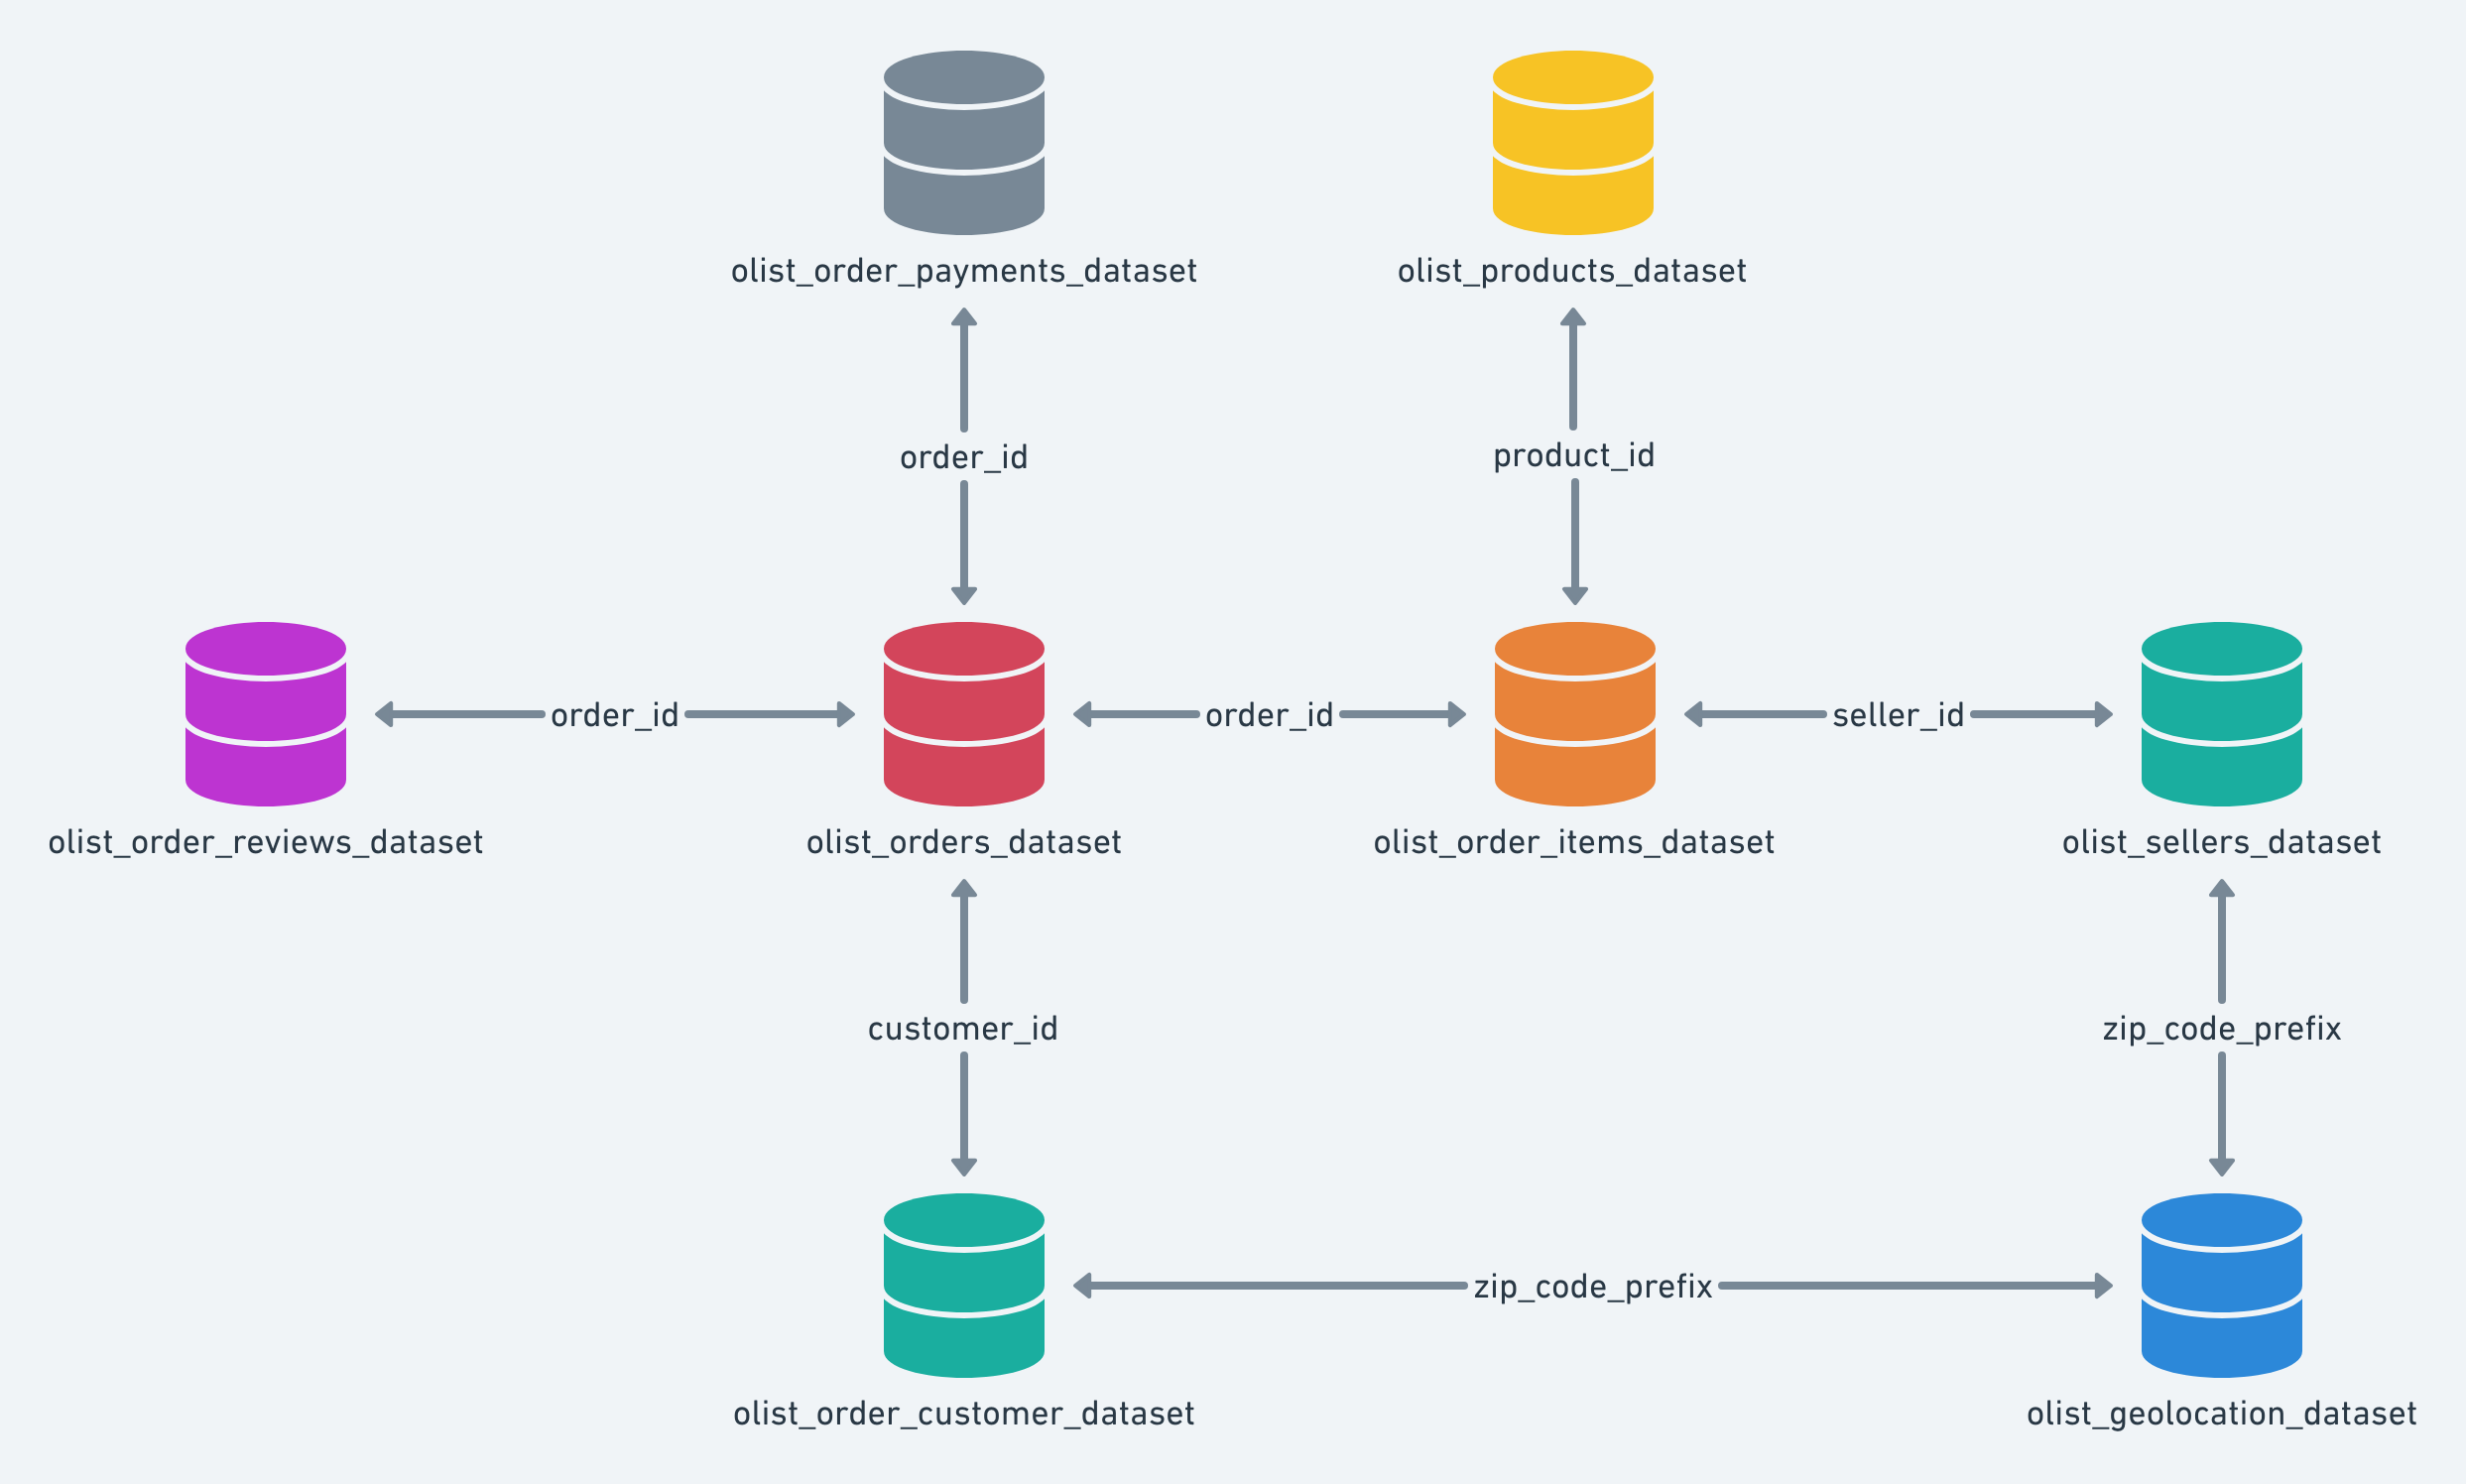

In [77]:
# Menggabungkan data sesuai dengan relasi antar tabel pada gambar ERD diatas
all_data = orders.copy()
all_data = all_data.merge(
    customers,
    on="customer_id",
    how="left"
)
all_data = all_data.merge(
    order_items,
    on="order_id",
    how="left"
)
all_data = all_data.merge(
    products,
    on="product_id",
    how="left"
)
all_data = all_data.merge(
    sellers,
    on="seller_id",
    how="left"
)
payment_agg = (
    payments
    .groupby("order_id", as_index=False)
    .agg(
        total_payment_value=("payment_value", "sum"),
        max_installments=("payment_installments", "max"),
        payment_type=("payment_type", lambda x: x.mode().iloc[0])
    )
)

all_data = all_data.merge(
    payment_agg,
    on="order_id",
    how="left"
)
review_agg = (
    reviews
    .groupby("order_id", as_index=False)
    .agg(
        review_score_avg=("review_score", "mean"),
        review_score_max=("review_score", "max")
    )
)

all_data = all_data.merge(
    review_agg,
    on="order_id",
    how="left"
)
geo_clean = geolocation.drop_duplicates(
    subset="geolocation_zip_code_prefix"
)

all_data = all_data.merge(
    geo_clean,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
)
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("All Data:", all_data.shape)

all_data.info()


Orders: (99441, 8)
Order Items: (112650, 7)
All Data: (113425, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state          

In [78]:
# Cek duplikasi pada all_data 
all_data.duplicated(
    subset=["order_id", "order_item_id"]
).sum()

np.int64(0)

In [79]:
# Menyimpan all_data ke file CSV untuk pembuatan dasboard di tahap selanjutnya
# all_data.to_csv("all_data_ans.csv", index=False)

## Exploratory Data Analysis (EDA)

### Tabel Customers

In [80]:
# Customer
print("Jumlah kota pelanggan unik:", customers['customer_city'].nunique())
print("Jumlah negara pelanggan unik:", customers['customer_state'].nunique())

Jumlah kota pelanggan unik: 4119
Jumlah negara pelanggan unik: 27


In [81]:
customers['customer_state'].value_counts().head()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

### Tabel Products

In [82]:
# Product
print("Jumlah kategori produk unik:", products['product_category_name'].nunique())
print("Kategori produk unik:", products['product_category_name'].value_counts().head())

Jumlah kategori produk unik: 74
Kategori produk unik: product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: count, dtype: int64


### Tabel Orders

In [83]:
# Order
print("Jumlah status pesanan unik:", orders['order_status'].nunique())
print(orders['order_status'].value_counts())

Jumlah status pesanan unik: 8
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Dari total order yang tercatat, mayoritas berada pada status delivered, menunjukkan bahwa sebagian besar transaksi berhasil diselesaikan.

### Payments

In [84]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [85]:
payments.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

### Tabel Order Items

In [86]:
# order item
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [87]:
print(order_items.price.describe())

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [88]:
order_items[order_items['price'] == order_items['price'].max()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


### Tabel Geolocation

In [89]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [90]:
geolocation.geolocation_zip_code_prefix.nunique()

19015

### Tabel Sellers

In [91]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [92]:
sellers.seller_state.value_counts().head()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: count, dtype: int64

In [93]:
sellers.seller_city.value_counts().head()

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: count, dtype: int64

### Reviews

In [94]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [95]:
reviews.review_score.value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### EDA pertanyaan 1

In [ ]:
# Analisis Revenue per Kategori Produk (2016-2018)
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)

# Hanya mengambil yang orderannya terkirim
orders_filtered = orders[
    (orders['order_status'] == 'delivered') &
    (orders['order_purchase_timestamp'].dt.year.between(2016, 2018))
]

# Gabung tabel yang diperlukan
df = (
    orders_filtered
    .merge(order_items, on='order_id', how='inner')
    .merge(products, on='product_id', how='inner')
    .merge(category_name_translation, on='product_category_name', how='left')
    .merge(reviews[['order_id', 'review_score']], on='order_id', how='left')
)
summary = (
    df.groupby('product_category_name_english')
        .agg(
            Total_Orders=('order_id', 'nunique'),
            Total_Revenue=('price', 'sum'),
            Avg_Order_Value=('price', 'mean'),
            Avg_Review_Score=('review_score', 'mean')
        )
        .reset_index()
)

summary.sort_values(by='Total_Revenue', ascending=False)

,product_category_name_english,Total_Orders,Total_Revenue,Avg_Order_Value,Avg_Review_Score
43,health_beauty,8647,1237439.95,129.996843,4.190778
70,watches_gifts,5495,1167246.63,198.883392,4.071931
7,bed_bath_table,9272,1037177.69,93.380543,3.920983
65,sports_leisure,7530,960189.09,113.109800,4.166430
15,computers_accessories,6530,896243.28,116.274427,3.984750
...,...,...,...,...,...
35,flowers,29,1110.04,33.637576,4.419355
46,home_comfort_2,24,760.27,25.342333,3.629630
11,cds_dvds_musicals,12,730.00,52.142857,4.642857
29,fashion_childrens_clothes,7,519.95,74.278571,5.000000


In [ ]:
# Hitung total revenue keseluruhan
total_revenue = summary['Total_Revenue'].sum()
total_revenue

np.float64(13101223.42)

Total revenue selama 2016-2018 yaitu 13101223.42 dollar.

In [119]:
# Kontribusi revenue per kategori
summary['Revenue_Contribution (%)'] = (
    summary['Total_Revenue'] / total_revenue * 100
)
# urutkan
summary = summary.sort_values(
    by='Total_Revenue',
    ascending=False
)
# Menyederhanakan
summary['Total_Revenue'] = summary['Total_Revenue'].round(2)
summary['Avg_Order_Value'] = summary['Avg_Order_Value'].round(2)
summary['Avg_Review_Score'] = summary['Avg_Review_Score'].round(2)
summary['Revenue_Contribution (%)'] = summary['Revenue_Contribution (%)'].round(2)
summary.head(10)

,product_category_name_english,Total_Orders,Total_Revenue,Avg_Order_Value,Avg_Review_Score,Revenue_Contribution (%)
43,health_beauty,8647,1237439.95,130.00,4.19,9.45
70,watches_gifts,5495,1167246.63,198.88,4.07,8.91
7,bed_bath_table,9272,1037177.69,93.38,3.92,7.92
65,sports_leisure,7530,960189.09,113.11,4.17,7.33
15,computers_accessories,6530,896243.28,116.27,3.98,6.84
39,furniture_decor,6307,718344.78,87.19,3.95,5.48
49,housewares,5743,617836.73,90.61,4.11,4.72
20,cool_stuff,3559,612071.86,164.23,4.19,4.67
5,auto,3810,580263.44,139.55,4.12,4.43
69,toys,3804,472109.78,116.92,4.21,3.60


**Insight:**

Berdasarkan analisis data transaksi E-Commerce periode 2016–2018 dengan fokus pada order berstatus delivered, kategori **health_beauty** menjadi penyumbang pendapatan terbesar dengan total sebesar 1.233.131,72 dengan kontribusi 9,45%, diikuti oleh watches_gifts (1.166.176,98) dan bed_bath_table (1.023.434,76), 

Sementara sports_leisure dan computers_accessories juga memberikan kontribusi signifikan, yang menunjukkan bahwa produk kebutuhan personal, hadiah, dan perlengkapan rumah tangga merupakan penggerak utama pendapatan selama periode tersebut.

### EDA Pertanyaan 2

In [ ]:
# Menggabungkan data 
df_payment = (
    orders_filtered
    .merge(payments, on='order_id', how='inner')
    .merge(order_items, on='order_id', how='inner')
)
# Kelompokkan dengan payment type
payment_summary = (
    df_payment
    .groupby('payment_type')
    .agg(
        Frequency=('order_id', 'count'),
        Total_Revenue=('payment_value', 'sum'),
        Avg_Transaction_Value=('payment_value', 'mean')
    )
    .reset_index()
)
payment_summary.head()

,payment_type,Frequency,Total_Revenue,Avg_Transaction_Value
0,boleto,22362,3943080.78,176.329522
1,credit_card,84896,15190241.73,178.927649
2,debit_card,1654,246727.51,149.170200
3,voucher,6123,396110.42,64.692213


**Insight:**

Selama periode 2016–2018, 
- credit card merupakan metode pembayaran yang paling sering digunakan pelanggan sekaligus memiliki nilai transaksi tertinggi.
Metode ini mendominasi baik dari sisi jumlah transaksi maupun total nilai pembayaran, menunjukkan preferensi pelanggan terhadap metode pembayaran yang cepat, fleksibel, dan praktis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memberikan kontribusi pendapatan terbesar pada E-Commerce selama periode 2016–2018?

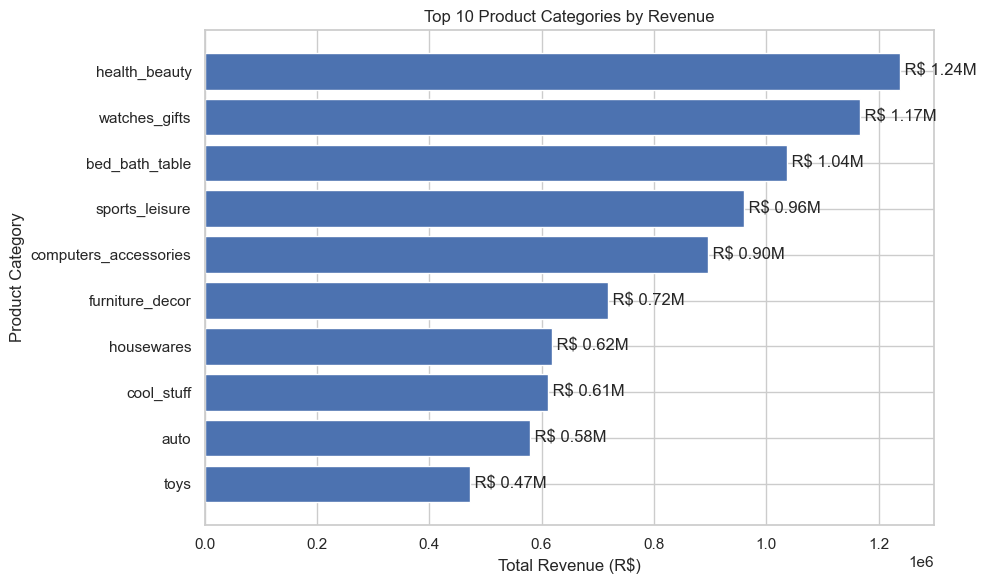

In [98]:
# Visualisasi Top 10 Kategori Produk berdasarkan Revenue
top10 = summary.head(10).sort_values('Total_Revenue')

plt.figure(figsize=(10, 6))
plt.barh(
    top10['product_category_name_english'],
    top10['Total_Revenue']
)

plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Total Revenue (R$)')
plt.ylabel('Product Category')

for i, v in enumerate(top10['Total_Revenue']):
    plt.text(v, i, f' R$ {v/1e6:.2f}M', va='center')

plt.tight_layout()
plt.show()

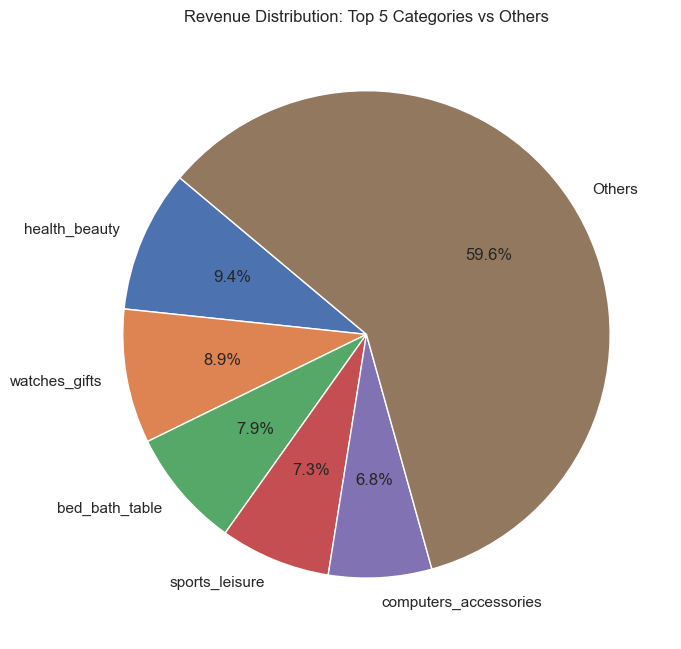

In [99]:
# Visualisasi Distribusi Revenue Kategori Produk (Top 5 vs Others)
top5 = summary.head(5)
others_value = summary['Total_Revenue'][5:].sum()

labels = list(top5['product_category_name_english']) + ['Others']
sizes = list(top5['Total_Revenue']) + [others_value]

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Revenue Distribution: Top 5 Categories vs Others')
plt.tight_layout()
plt.show()

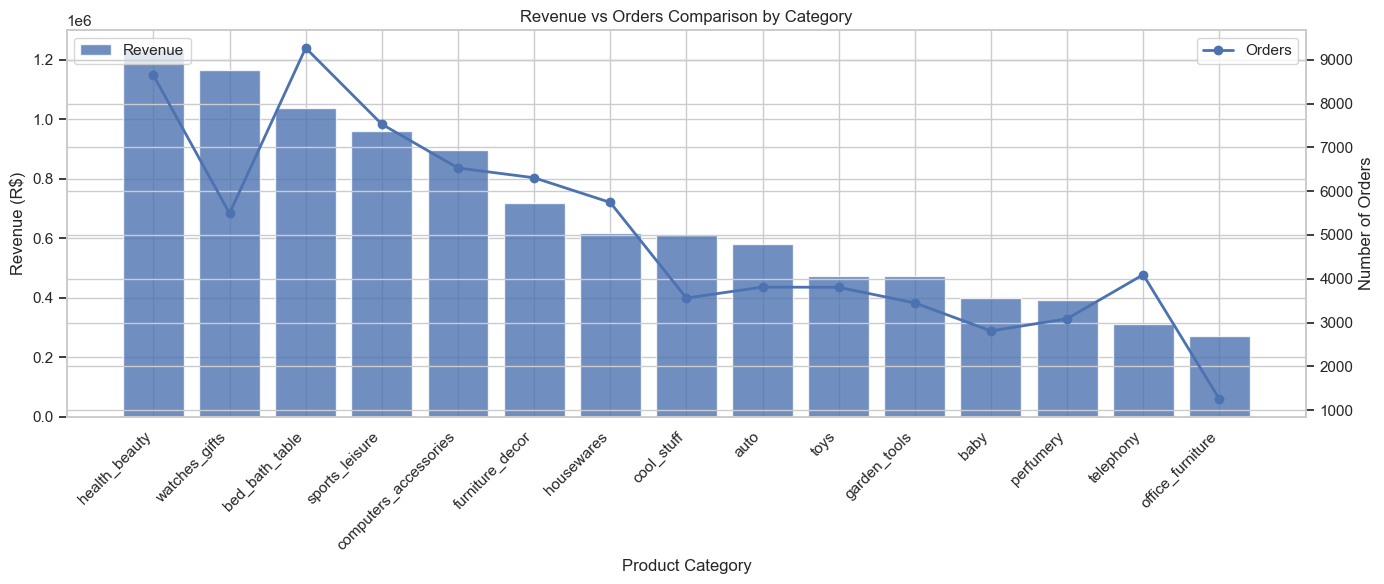

In [100]:
# Ambil Top 15 berdasarkan revenue
top15 = summary.sort_values(
    by='Total_Revenue',
    ascending=False
).head(15)

plt.figure(figsize=(14, 6))
# === BAR CHART (Revenue) ===
ax1 = plt.gca()
ax1.bar(
    top15['product_category_name_english'],
    top15['Total_Revenue'],
    alpha=0.8,
    label='Revenue'
)

ax1.set_xlabel('Product Category')
ax1.set_ylabel('Revenue (R$)')
ax1.tick_params(axis='y')
plt.xticks(rotation=45, ha='right')

# === LINE CHART (Orders) ===
ax2 = ax1.twinx()
ax2.plot(
    top15['product_category_name_english'],
    top15['Total_Orders'],
    marker='o',
    linewidth=2,
    label='Orders'
)

ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='y')

# === TITLE & LEGEND ===
plt.title('Revenue vs Orders Comparison by Category')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Metode pembayaran apa yang paling sering digunakan pelanggan dan memiliki nilai transaksi tertinggi selama periode 2016–2018?

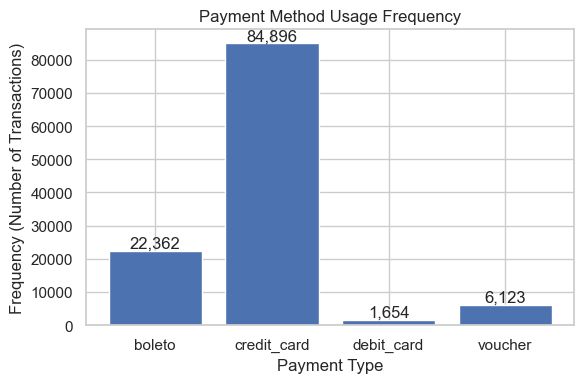

In [ ]:
# Visualisasi
plt.figure(figsize=(6,4))
plt.bar(
    payment_summary['payment_type'],
    payment_summary['Frequency']
)

plt.title('Payment Method Usage Frequency')
plt.xlabel('Payment Type')
plt.ylabel('Frequency (Number of Transactions)')

for i, v in enumerate(payment_summary['Frequency']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

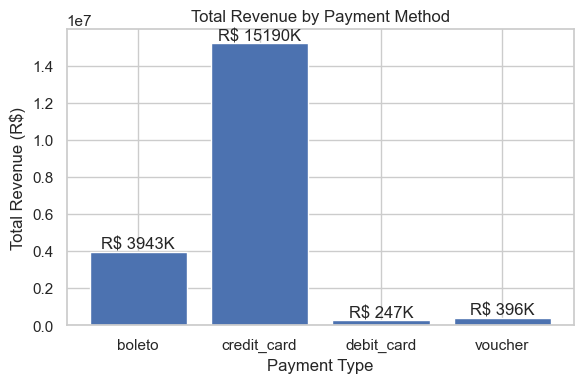

In [102]:
plt.figure(figsize=(6,4))
plt.bar(
    payment_summary['payment_type'],
    payment_summary['Total_Revenue']
)

plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Type')
plt.ylabel('Total Revenue (R$)')

for i, v in enumerate(payment_summary['Total_Revenue']):
    plt.text(i, v, f'R$ {v/1000:.0f}K', ha='center', va='bottom')

plt.tight_layout()
plt.show()


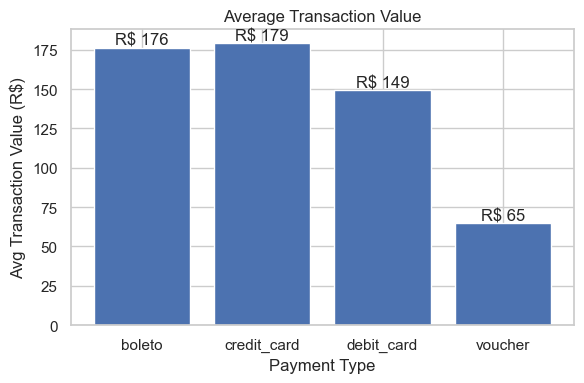

In [103]:
plt.figure(figsize=(6,4))
plt.bar(
    payment_summary['payment_type'],
    payment_summary['Avg_Transaction_Value']
)

plt.title('Average Transaction Value')
plt.xlabel('Payment Type')
plt.ylabel('Avg Transaction Value (R$)')

for i, v in enumerate(payment_summary['Avg_Transaction_Value']):
    plt.text(i, v, f'R$ {v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


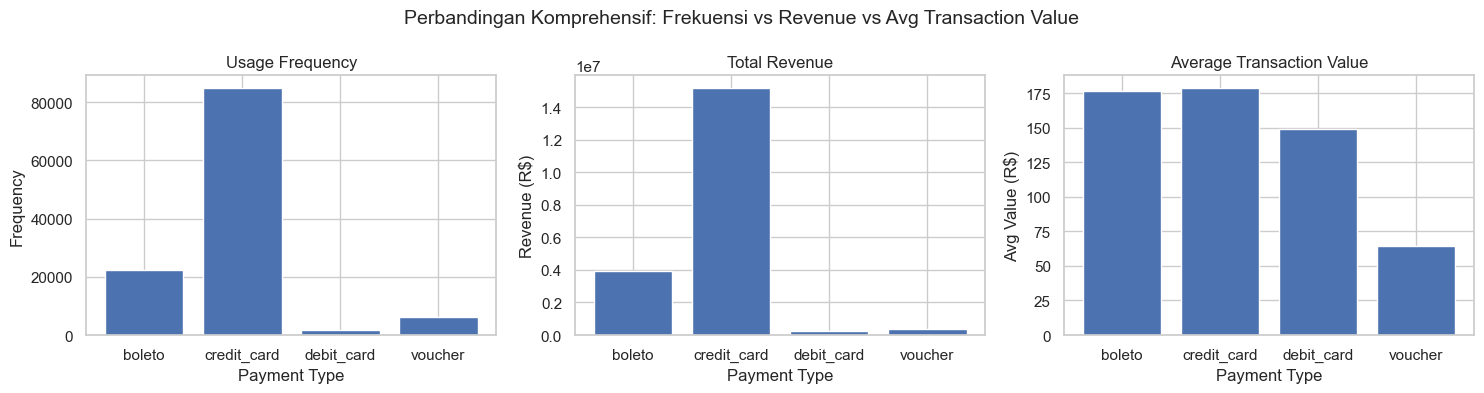

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Frequency
axes[0].bar(payment_summary['payment_type'], payment_summary['Frequency'])
axes[0].set_title('Usage Frequency')
axes[0].set_ylabel('Frequency')

# Revenue
axes[1].bar(payment_summary['payment_type'], payment_summary['Total_Revenue'])
axes[1].set_title('Total Revenue')
axes[1].set_ylabel('Revenue (R$)')

# Avg Transaction
axes[2].bar(payment_summary['payment_type'], payment_summary['Avg_Transaction_Value'])
axes[2].set_title('Average Transaction Value')
axes[2].set_ylabel('Avg Value (R$)')

for ax in axes:
    ax.set_xlabel('Payment Type')

plt.suptitle(
    'Perbandingan Komprehensif: Frekuensi vs Revenue vs Avg Transaction Value',
    fontsize=14
)

plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)


3. Bagaimana segmentasi pelanggan E-Commerce berdasarkan Recency, Frequency,
   dan Monetary (RFM) selama periode 2016–2018, serta segmen pelanggan
   mana yang memberikan kontribusi pendapatan terbesar?



### Analisis RFM (Recency, Frequency, & Monetary)
Untuk mendapatkan insight yang lebih mendalam mengenai segmentasi pelanggan, kita menggunakan teknik Analisis RFM. Teknik ini sangat efektif untuk mengelompokkan pelanggan berdasarkan perilaku transaksi mereka sehingga bisnis dapat menentukan strategi pemasaran yang tepat untuk setiap segmen.

Analisis ini berfokus pada tiga parameter utama:

1. Recency (Kebaruan): Mengukur jumlah hari sejak transaksi terakhir pelanggan. Semakin kecil nilainya, semakin besar kemungkinan pelanggan tersebut masih aktif dan akan merespons promosi.

2. Frequency (Frekuensi): Mengukur seberapa sering seorang pelanggan melakukan transaksi dalam periode tertentu. Ini membantu kita mengidentifikasi pelanggan yang loyal dan terbiasa menggunakan layanan kita.

3. Monetary (Nilai Ekonomi): Mengukur total jumlah uang yang dihabiskan oleh pelanggan. Parameter ini menunjukkan kontribusi finansial langsung pelanggan terhadap pendapatan bisnis.

Tujuan Analisis:

* Mengidentifikasi pelanggan terbaik (Best Customers).
* Mendeteksi pelanggan yang berisiko pergi (At Risk/Churn) agar bisa diberikan penawaran khusus.
* Menyusun strategi retensi yang dipersonalisasi berdasarkan perilaku belanja mereka.

In [105]:
def calculate_rfm(df_input):
    snapshot_date = df_input['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

    rfm = df_input.groupby('customer_unique_id').agg({
        'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'total_payment_value': 'sum'
    }).reset_index()

    rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

    # RFM Scoring (1–5)
    rfm['r_score'] = pd.qcut(
        rfm['recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop'
    )
    rfm['f_score'] = pd.qcut(
        rfm['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop'
    )
    rfm['m_score'] = pd.qcut(
        rfm['monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop'
    )

    rfm['rfm_score_sum'] = (
        rfm['r_score'].astype(int)
        + rfm['f_score'].astype(int)
        + rfm['m_score'].astype(int)
    )

    # Segmentasi
    def segment_customer(row):
        r, f, m = int(row['r_score']), int(row['f_score']), int(row['m_score'])

        if r >= 4 and f >= 4 and m >= 4:
            return 'Champions'
        elif r >= 3 and f >= 3 and m >= 3:
            return 'Loyal Customers'
        elif r >= 4 and f <= 2:
            return 'Promising'
        elif r >= 3 and f <= 2 and m <= 2:
            return 'New Customers'
        elif r <= 2 and f >= 3 and m >= 3:
            return 'At Risk'
        elif r <= 2 and f <= 2 and m >= 3:
            return 'Cant Lose Them'
        elif r <= 2 and f >= 2 and m <= 2:
            return 'Hibernating'
        else:
            return 'Lost'
    rfm['segment'] = rfm.apply(segment_customer, axis=1)
    return rfm

In [106]:
# Load data dan prepare RFM
def load_data():
    # 1. Load data utama (Hanya di dalam sini)
    df = pd.read_csv(ROOT_DIR / "Dasboard" / "all_data_ans.csv")
    # Load translation
    df_translation = pd.read_csv(ROOT_DIR / "Data" / "product_category_name_translation.csv") 
    
    # Merge untuk translate kategori
    df = df.merge(
        df_translation,
        on='product_category_name',
        how='left'
    )
    # Convert kolom datetime
    datetime_columns = [
        'order_purchase_timestamp',
        'order_approved_at', 
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date'
    ]
    
    for col in datetime_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    return df

# Load data
df = load_data()
rfm_data = calculate_rfm(df)
rfm_data.head()


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score_sum,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,4,9,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1,6,Promising
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,4,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,4,Lost
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,4,7,Cant Lose Them


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4328\3910701943.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


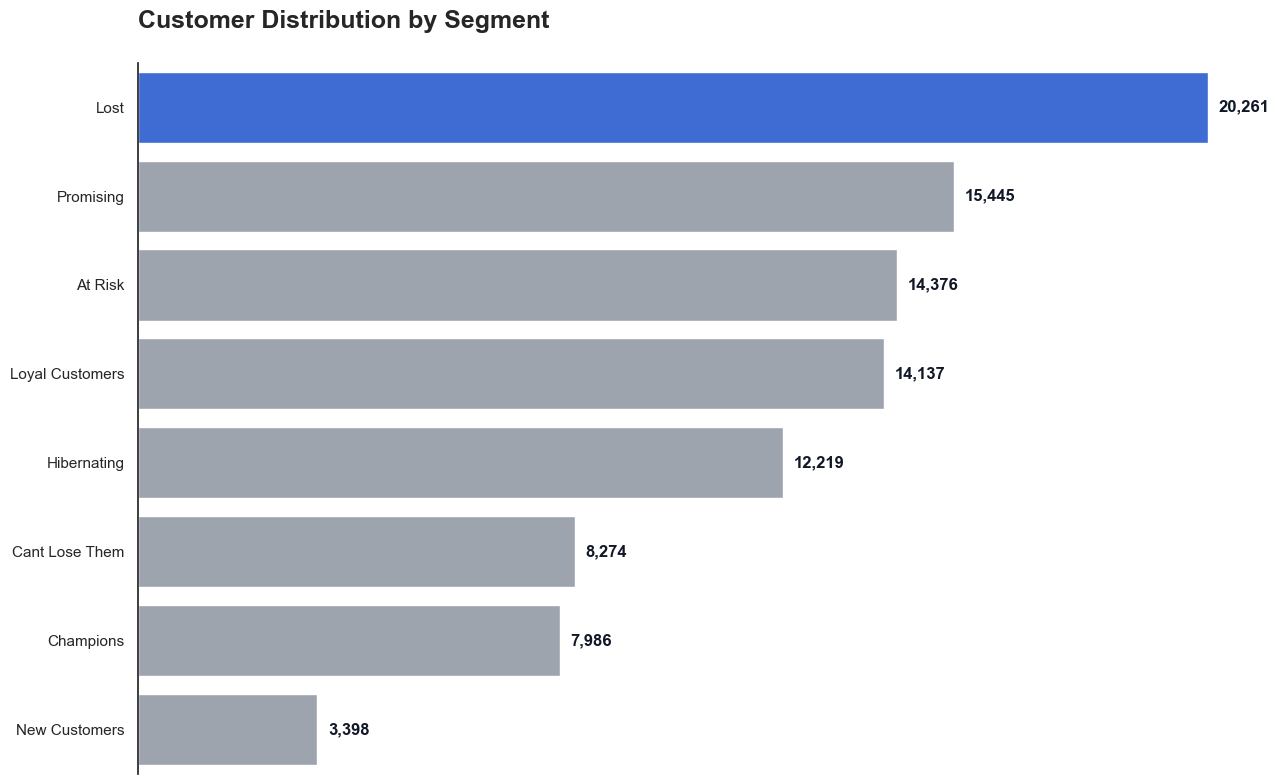

In [107]:
# Visualisasi Distribusi Segmen Pelanggan (Sesuai Prinsip Visualisasi)
segment_dist = rfm_data['segment'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(13, 8))
sns.set_style("white")  # Latar belakang bersih

# Warna sesuai prinsip visualisasi
base_color = '#9ca3af'       # abu-abu netral
highlight_color = '#2563eb'  # biru untuk nilai tertinggi
max_value = segment_dist.max()

colors = [
    highlight_color if value == max_value else base_color
    for value in segment_dist.values
]

ax = sns.barplot(
    x=segment_dist.values,
    y=segment_dist.index,
    palette=colors
)

# Label nilai
for i, v in enumerate(segment_dist.values):
    ax.text(
        v + (segment_dist.max() * 0.01),
        i,
        f'{v:,}',
        va='center',
        fontweight='bold',
        color='#111827'
    )

# Rapikan tampilan
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

plt.title(
    'Customer Distribution by Segment',
    loc='left',
    fontsize=18,
    fontweight='bold',
    pad=25
)

plt.ylabel(None)
plt.tight_layout()
plt.show()

Tingkat Churn yang Sangat Tinggi dilihat dari banyaknya segment pelanggan Lost dengan jumlah 20,261 (21,1%). Dominasi ini menandakan bahwa sebagian besar pelanggan hanya melakukan transaksi satu kali (atau sangat sedikit) dan tidak pernah kembali dalam jangka waktu yang sangat lama. Bisnis berhasil mengakuisisi pelanggan baru, namun gagal mempertahankan mereka.

In [108]:
# Analisis Revenue per Segmen Pelanggan
segment_revenue = (
    rfm_data
    .groupby('segment')
    .agg(
        total_revenue=('monetary', 'sum'),
        customer_count=('customer_id', 'count'),
        total_orders=('frequency', 'sum')
    )
    .reset_index()
    .sort_values('total_revenue', ascending=False)
)
segment_revenue


,segment,total_revenue,customer_count,total_orders
0,At Risk,5405742.28,14376,20973
2,Champions,4252819.71,7986,14753
5,Loyal Customers,3737350.20,14137,17774
7,Promising,2415180.52,15445,15445
1,Cant Lose Them,1959157.58,8274,8274
4,Lost,1822947.03,20261,20456
3,Hibernating,690028.28,12219,12352
6,New Customers,187501.06,3398,3398


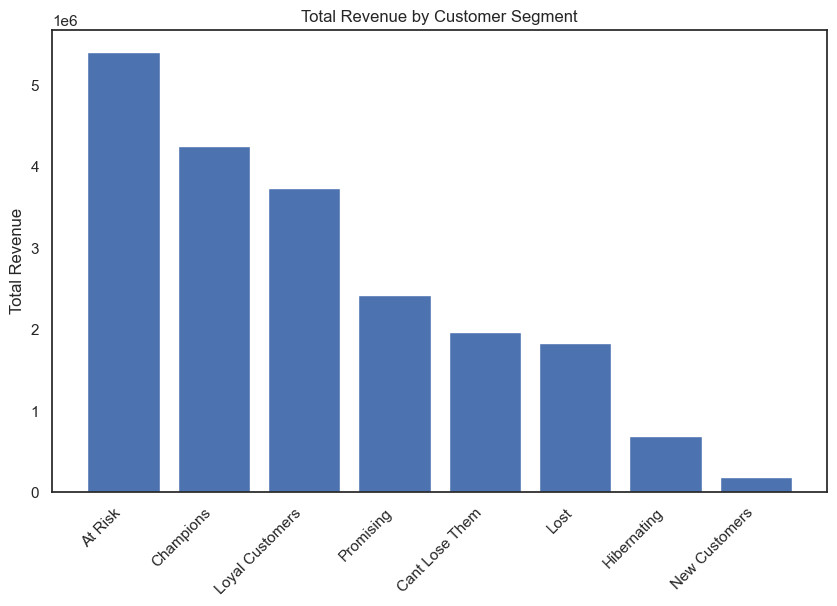

In [109]:
# Visualisasi Revenue per Segmen Pelanggan
plt.figure(figsize=(10, 6))
plt.bar(segment_revenue['segment'], segment_revenue['total_revenue'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Customer Segment')
plt.show()

Berdasarkan analisis RFM, segmentasi pelanggan menunjukkan bahwa meskipun segmen Lost mendominasi dari sisi kuantitas dengan proporsi sekitar 21,08% dari total pelanggan, kontribusi pendapatan terbesar justru dihasilkan oleh segmen At Risk yang menyumbang 26,41% dari total revenue, disusul oleh segmen Champions sebesar 20,78%. Kondisi ini mengindikasikan bahwa meskipun perusahaan memiliki basis pelanggan non-aktif yang besar, ketergantungan pendapatan masih sangat tinggi pada kelompok pelanggan yang mulai jarang bertransaksi (At Risk), sehingga prioritas strategi harus difokuskan pada upaya retensi bagi segmen bernilai tinggi tersebut dan kampanye win-back untuk mengaktifkan kembali potensi pendapatan dari segmen Lost.

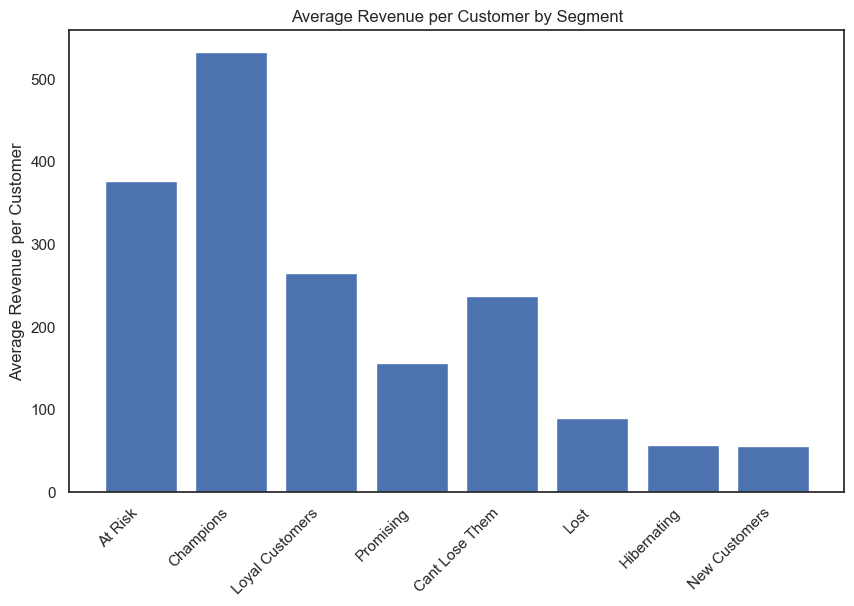

In [110]:
# Visualisasi Average Revenue per Customer per Segmen Pelanggan
segment_revenue['avg_revenue_per_customer'] = (
    segment_revenue['total_revenue'] / segment_revenue['customer_count']
)

plt.figure(figsize=(10, 6))
plt.bar(segment_revenue['segment'], segment_revenue['avg_revenue_per_customer'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Revenue per Customer')
plt.title('Average Revenue per Customer by Segment')
plt.show()


Grafik ini menunjukkan bahwa segmen Champions memiliki rata-rata pendapatan per pelanggan tertinggi, sehingga menjadi kontributor utama revenue dan perlu diprioritaskan dalam strategi retensi. Segmen At Risk dan Loyal Customers masih memberikan kontribusi yang cukup besar, namun memerlukan perhatian agar tidak mengalami penurunan nilai. Segmen Promising dan Can’t Lose Them berada pada level menengah dengan potensi untuk ditingkatkan. Sementara itu, segmen Lost, Hibernating, dan New Customers memiliki kontribusi terendah, sehingga lebih tepat difokuskan pada strategi aktivasi atau reaktivasi yang efisien dari sisi biaya.

#### Visualisasi tambahan pelengkap dasboard

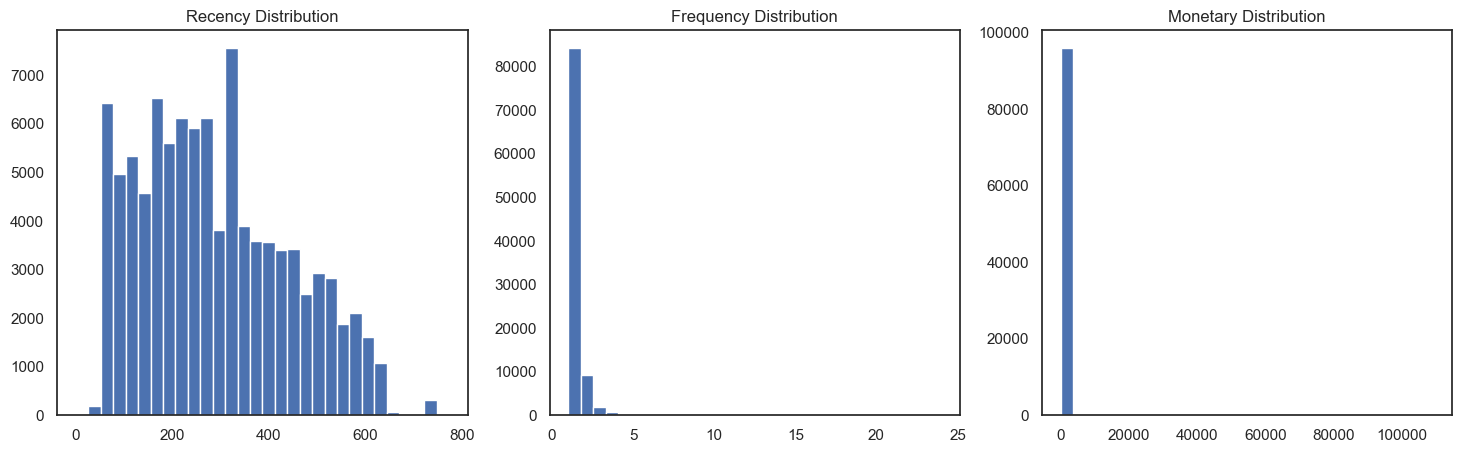

In [111]:
# Visualisasi Distribusi Recency, Frequency, dan Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(rfm_data['recency'], bins=30)
axes[0].set_title('Recency Distribution')

axes[1].hist(rfm_data['frequency'], bins=30)
axes[1].set_title('Frequency Distribution')

axes[2].hist(rfm_data['monetary'], bins=30)
axes[2].set_title('Monetary Distribution')

plt.show()


In [112]:
# Analisis Statistik Segmen Pelanggan
segment_stats = (
    rfm_data
    .groupby('segment')
    .agg(
        customer_count=('customer_id', 'count'),
        avg_recency=('recency', 'mean'),
        median_recency=('recency', 'median'),
        avg_frequency=('frequency', 'mean'),
        median_frequency=('frequency', 'median'),
        total_orders=('frequency', 'sum'),
        avg_monetary=('monetary', 'mean'),
        median_monetary=('monetary', 'median'),
        total_revenue=('monetary', 'sum')
    )
    .round(2)
)

segment_stats['customer_pct'] = (
    segment_stats['customer_count'] /
    segment_stats['customer_count'].sum() * 100
).round(2)

segment_stats['revenue_pct'] = (
    segment_stats['total_revenue'] /
    segment_stats['total_revenue'].sum() * 100
).round(2)

segment_stats.sort_values('total_revenue', ascending=False)


,customer_count,avg_recency,median_recency,avg_frequency,median_frequency,total_orders,avg_monetary,median_monetary,total_revenue,customer_pct,revenue_pct
segment,,,,,,,,,,,
At Risk,14376,444.66,430.0,1.46,1.0,20973,376.03,193.39,5405742.28,14.96,26.41
Champions,7986,141.16,144.0,1.85,2.0,14753,532.53,284.86,4252819.71,8.31,20.78
Loyal Customers,14137,207.43,230.0,1.26,1.0,17774,264.37,149.14,3737350.20,14.71,18.26
Promising,15445,140.86,144.0,1.00,1.0,15445,156.37,102.16,2415180.52,16.07,11.80
Cant Lose Them,8274,447.08,435.0,1.00,1.0,8274,236.78,159.49,1959157.58,8.61,9.57
Lost,20261,248.60,246.0,1.01,1.0,20456,89.97,64.00,1822947.03,21.08,8.91
Hibernating,12219,447.21,436.0,1.01,1.0,12352,56.47,56.80,690028.28,12.72,3.37
New Customers,3398,270.20,269.0,1.00,1.0,3398,55.18,55.01,187501.06,3.54,0.92


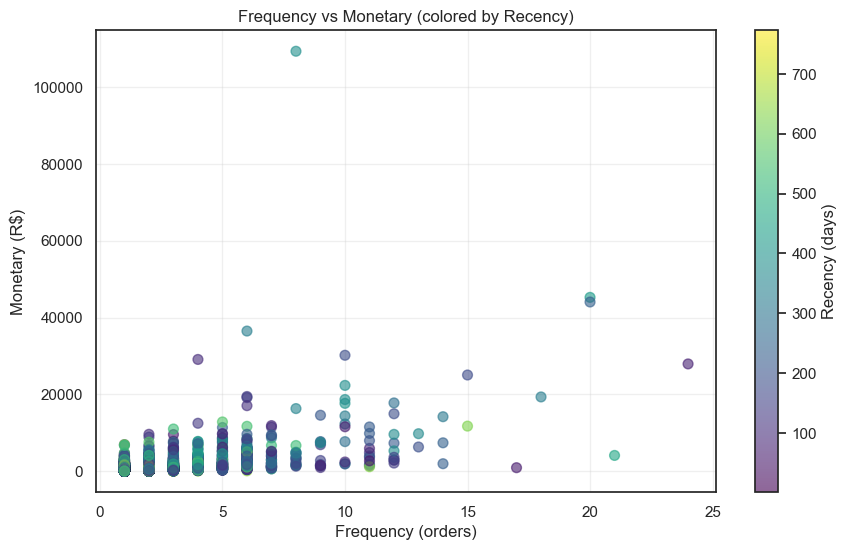

In [113]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    rfm_data['frequency'],
    rfm_data['monetary'],
    c=rfm_data['recency'],
    cmap='viridis',
    alpha=0.6,
    s=50
)

plt.xlabel('Frequency (orders)')
plt.ylabel('Monetary (R$)')
plt.title('Frequency vs Monetary (colored by Recency)')
plt.grid(alpha=0.3)

cbar = plt.colorbar(scatter)
cbar.set_label('Recency (days)')

plt.show()

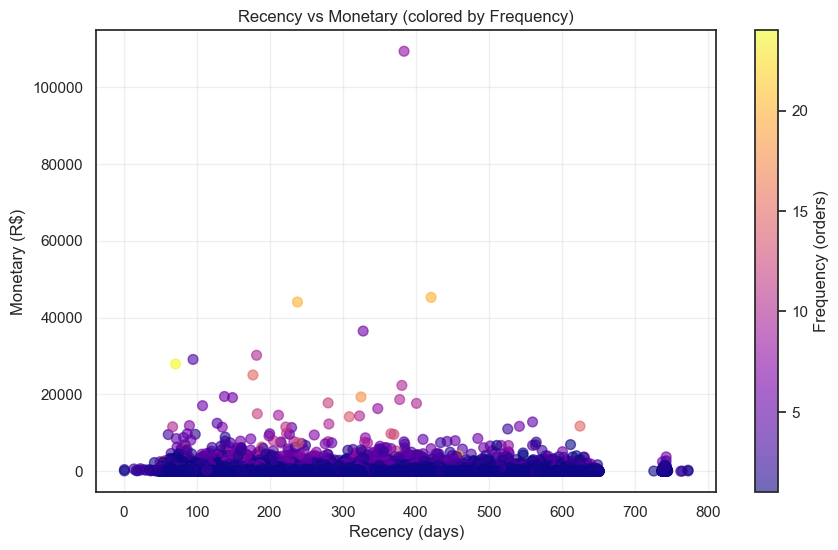

In [114]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    rfm_data['recency'],
    rfm_data['monetary'],
    c=rfm_data['frequency'],
    cmap='plasma',
    alpha=0.6,
    s=50
)

plt.xlabel('Recency (days)')
plt.ylabel('Monetary (R$)')
plt.title('Recency vs Monetary (colored by Frequency)')
plt.grid(alpha=0.3)

cbar = plt.colorbar(scatter)
cbar.set_label('Frequency (orders)')

plt.show()

## Conclusion


Berdasarkan analisis data E-Commerce periode 2016–2018 yang mencakup agregasi pendapatan, metode pembayaran, serta segmentasi pelanggan menggunakan pendekatan Recency, Frequency, dan Monetary (RFM), diperoleh kesimpulan berikut:

1. Kategori produk apa yang memberikan kontribusi pendapatan terbesar
   pada E-Commerce selama periode 2016–2018?

Kategori **Health & Beauty** merupakan kontributor pendapatan terbesar selama periode 2016–2018. Hal ini menunjukkan tingginya permintaan dan nilai transaksi pada produk perawatan diri dibandingkan kategori lainnya.
**Insight bisnis**: kategori ini memiliki potensi revenue yang stabil dan berkelanjutan.
Rekomendasi strategis: perusahaan disarankan memprioritaskan pengembangan portofolio produk, meningkatkan intensitas promosi, serta memastikan ketersediaan stok pada kategori Health & Beauty untuk memaksimalkan pendapatan.

2. Metode pembayaran apa yang paling sering digunakan pelanggan dan
   memiliki nilai transaksi tertinggi selama periode 2016–2018?

Metode pembayaran **Credit Card** menjadi metode yang paling sering digunakan sekaligus memiliki **nilai transaksi tertinggi**. Temuan ini mengindikasikan bahwa pelanggan sangat mempertimbangkan kemudahan transaksi dan fasilitas tambahan seperti cicilan serta promo kartu kredit.
**Insight bisnis**: metode pembayaran berperan penting dalam mendorong peningkatan nilai transaksi.
Rekomendasi strategis: tim bisnis dapat mengoptimalkan kerja sama dengan penyedia kartu kredit, memperluas program promo cicilan, serta menyelaraskan kampanye pemasaran dengan periode belanja tertentu seperti payday dan event diskon besar.

3. Bagaimana segmentasi pelanggan E-Commerce berdasarkan Recency, Frequency,
   dan Monetary (RFM) selama periode 2016–2018, serta segmen pelanggan
   mana yang memberikan kontribusi pendapatan terbesar?

Hasil segmentasi RFM menunjukkan bahwa meskipun **segmen Lost** memiliki jumlah pelanggan terbesar, segmen **At Risk** dan pelanggan bernilai tinggi (Loyal/High-Value Customers) memberikan kontribusi pendapatan yang lebih signifikan.
**Insight bisnis**: kontribusi revenue lebih ditentukan oleh kualitas pelanggan dibandingkan kuantitas semata.
Rekomendasi strategis: perusahaan disarankan menjalankan program retensi dan win-back yang terarah, seperti penawaran personal, voucher eksklusif, dan komunikasi berbasis histori transaksi, khususnya untuk pelanggan bernilai tinggi yang berisiko churn.

Kesimpulan akhir, analisis ini menunjukkan bahwa peningkatan kinerja pendapatan E-Commerce dapat dicapai melalui fokus pada kategori produk unggulan, optimalisasi metode pembayaran dominan, serta strategi pengelolaan pelanggan berbasis RFM. Temuan ini memberikan dasar yang kuat bagi stakeholder dalam merumuskan keputusan bisnis yang lebih efektif dan berbasis data.